# Ciência de Dados com Python - Santander

In [1]:
# Python Version
from platform import python_version
print("Python Version used in this Jupyter Notebook:", python_version()) # Printing Python version

Python Version used in this Jupyter Notebook: 3.13.10


## 1. Introdução à Biblioteca Pandas

In [2]:
import pandas as pd

print(f"Pandas Version used: {pd.__version__}")

Pandas Version used: 2.3.3


In [3]:
df = pd.read_csv('dados_pandas_curso.csv')

In [4]:
df.head(n=4)

,id,data_aq,produto,quantidade,valor_UM,valor_Total,setor
0,0,2023-05-17,NaN,8,40.36,322.88,NaN
1,1,2023-11-22,NaN,4,20.80,83.20,NaN
2,2,2023-06-25,NaN,6,79.19,475.14,NaN
3,3,2024-11-08,NaN,4,104.75,419.00,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           549 non-null    int64  
 1   data_aq      549 non-null    object 
 2   produto      542 non-null    object 
 3   quantidade   549 non-null    int64  
 4   valor_UM     549 non-null    float64
 5   valor_Total  549 non-null    float64
 6   setor        535 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB


In [6]:
df.isnull().sum()

id              0
data_aq         0
produto         7
quantidade      0
valor_UM        0
valor_Total     0
setor          14
dtype: int64

In [7]:
df['setor'].unique()

array([nan, 'Brinquedos', 'brinquedos', 'mesa_Banho', 'brinquEdos',
       'Informatica', 'mesa_banho', 'perfumaria', 'informaticA',
       'Mesa_banho', 'informatica'], dtype=object)

In [8]:
# Padronizando coluna "setor"

print("\nANTES da padronização:")
print(df['setor'].value_counts(dropna=False))

# Aplicar padronização
df['setor'] = df['setor'].str.lower().str.capitalize()

print("\nDEPOIS da padronização:")
print(df['setor'].value_counts(dropna=False))

# Verificação Final
print("\n\nVERIFICAÇÃO: Categorias únicas após padronização")
print("-" * 50)
print(df['setor'].unique())


ANTES da padronização:
setor
brinquedos     61
perfumaria     58
Mesa_banho     58
mesa_Banho     56
informatica    55
brinquEdos     53
mesa_banho     52
Informatica    49
Brinquedos     47
informaticA    46
NaN            14
Name: count, dtype: int64

DEPOIS da padronização:
setor
Mesa_banho     166
Brinquedos     161
Informatica    150
Perfumaria      58
NaN             14
Name: count, dtype: int64


VERIFICAÇÃO: Categorias únicas após padronização
--------------------------------------------------
[nan 'Brinquedos' 'Mesa_banho' 'Informatica' 'Perfumaria']


In [9]:
df['produto'].unique()

array([nan, 'Carrinho', 'Perfume', 'Shampoo', 'Teclado', 'Notebook',
       'Mouse', 'Tablet', 'Sabonete', 'Boneca', 'Creme'], dtype=object)

In [10]:
# Tratando os valores nulos em "setor" e "produto"

# Para dados de vendas, é melhor preencher com valores descritivos
df['setor'] = df['setor'].fillna('Não Classificado')
df['produto'] = df['produto'].fillna('Produto Não Informado')

df.head()

,id,data_aq,produto,quantidade,valor_UM,valor_Total,setor
0,0,2023-05-17,Produto Não Informado,8,40.36,322.88,Não Classificado
1,1,2023-11-22,Produto Não Informado,4,20.80,83.20,Não Classificado
2,2,2023-06-25,Produto Não Informado,6,79.19,475.14,Não Classificado
3,3,2024-11-08,Produto Não Informado,4,104.75,419.00,Não Classificado
4,4,2023-08-04,Produto Não Informado,5,40.50,202.50,Não Classificado


In [11]:
df['setor'].unique()

array(['Não Classificado', 'Brinquedos', 'Mesa_banho', 'Informatica',
       'Perfumaria'], dtype=object)

In [12]:
df['produto'].unique()

array(['Produto Não Informado', 'Carrinho', 'Perfume', 'Shampoo',
       'Teclado', 'Notebook', 'Mouse', 'Tablet', 'Sabonete', 'Boneca',
       'Creme'], dtype=object)

In [13]:
# Converter especificando o formato (mais rápido para grandes datasets)
df['data_aq'] = pd.to_datetime(df['data_aq'], format='%Y-%m-%d')

print(df['data_aq'].head(10))
print(f"Tipo: {df['data_aq'].dtype}")

0   2023-05-17
1   2023-11-22
2   2023-06-25
3   2024-11-08
4   2023-08-04
5   2023-10-29
6   2023-11-18
7   2024-03-25
8   2023-12-07
9   2024-09-05
Name: data_aq, dtype: datetime64[ns]
Tipo: datetime64[ns]


In [14]:
# Salvar DataFrame padronizado
df.to_csv('dados_pandas_padronizados.csv', index=False)
print("Dados padronizados salvos em 'dados_pandas_padronizados.csv'")

Dados padronizados salvos em 'dados_pandas_padronizados.csv'


<Axes: xlabel='setor'>

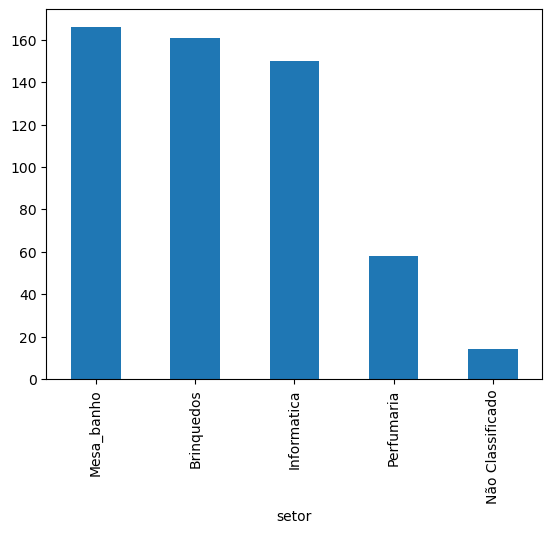

In [15]:
# Agrupamentos
df['setor'].value_counts().plot(kind='bar')

In [16]:
# Dados Estatísticos
df.describe()

,id,data_aq,quantidade,valor_UM,valor_Total
count,549.000000,549,549.000000,549.000000,549.000000
mean,274.000000,2023-12-28 06:04:35.409836032,6.010929,54.965191,330.091348
min,0.000000,2023-01-02 00:00:00,3.000000,5.110000,16.830000
25%,137.000000,2023-06-29 00:00:00,4.000000,32.270000,175.360000
50%,274.000000,2023-12-20 00:00:00,6.000000,54.900000,311.920000
75%,411.000000,2024-06-24 00:00:00,8.000000,78.050000,466.880000
max,548.000000,2024-12-30 00:00:00,9.000000,104.750000,868.410000
std,158.626921,NaN,1.853156,27.780558,196.222034


## 2 - Introdução à Biblioteca Scikit-learn

In [17]:
from sklearn.datasets import make_regression

# Gerando uma massa de dados
x, y = make_regression(n_samples = 200, n_features = 1, noise = 30)

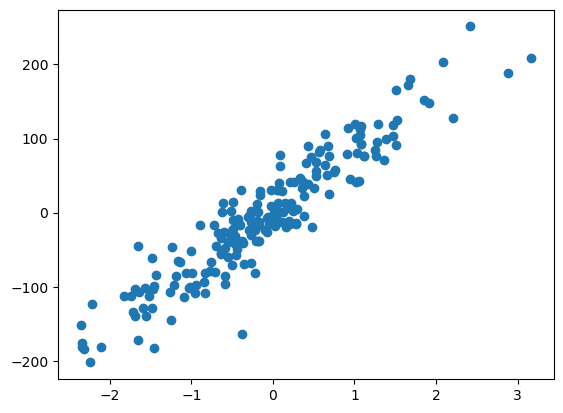

In [18]:
# Gráfico simples
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

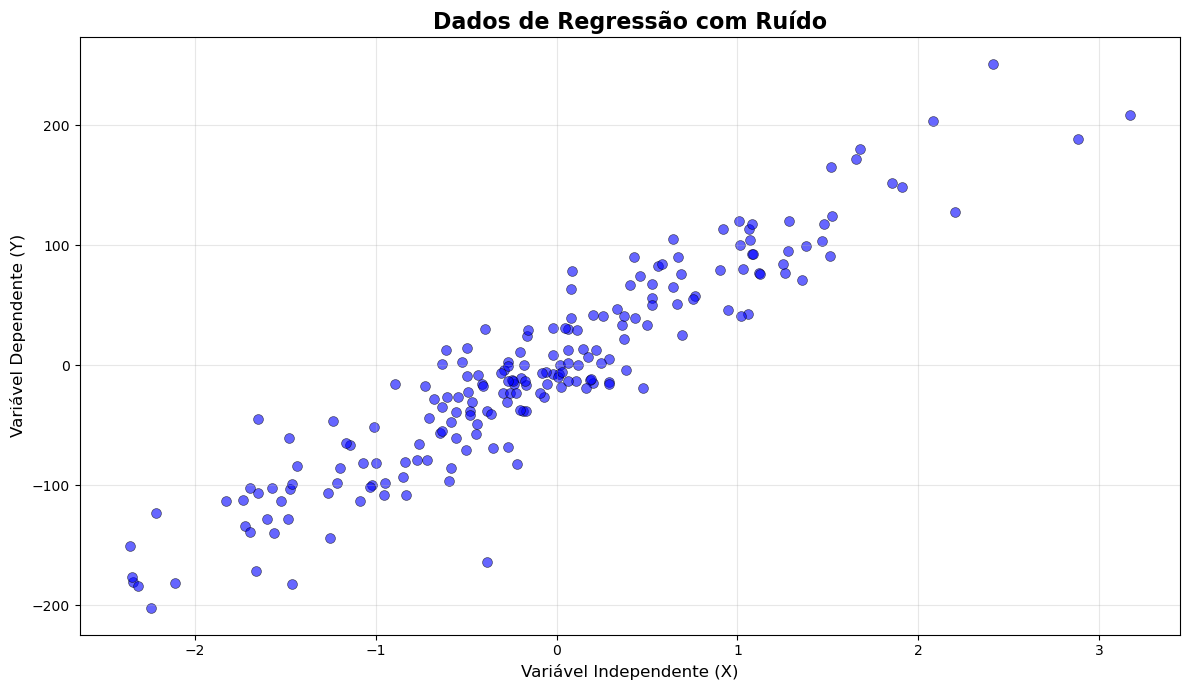

In [19]:
# Imprimindo o gráfico da massa de dados formatado
plt.figure(figsize=(12, 7))
plt.scatter(x, y, 
           color='blue',           # Cor dos pontos
           alpha=0.6,              # Transparência
           s=50,                   # Tamanho dos pontos
           edgecolors='black',     # Cor da borda
           linewidths=0.5)         # Espessura da borda

plt.title('Dados de Regressão com Ruído', fontsize=16, fontweight='bold')
plt.xlabel('Variável Independente (X)', fontsize=12)
plt.ylabel('Variável Dependente (Y)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# Com os dados gerados, já podemos iniciar a criação do nosso modelo de Machine Learning.
# Para isso, utilizaremos o módulo linear_model e a função LinearRegression().
from sklearn.linear_model import LinearRegression

# Criando o modelo
modelo = LinearRegression()

In [21]:
# Apresentar os dados para o modelo
modelo.fit(x, y)

# Modelo Preditivo
modelo.predict(x)

array([ -35.47035902,   14.24475888,  -34.12110836,  -35.92969156,
          9.44277642,  -29.29327816,   84.87789597,    4.13219399,
        117.52536759,  -17.78306807, -112.14484376,   62.3434227 ,
        -18.40141372,   36.32480232,  133.13234574,   55.04643455,
        -91.17724568,   -9.79376581,  -74.64060402, -108.70134518,
        -27.84459261,  -12.6807064 ,  -44.22257165,  151.19633831,
       -121.22564026,  -46.34896265,  -11.18881073,   18.60164236,
        -28.58635092,   28.83886764,  -31.37207424,  248.89076986,
         25.35555684,  -95.25956231,  -16.33153066, -178.81054841,
         89.50988866,   61.3428874 ,   25.1711263 ,  226.40215089,
         25.14680363,  -44.4915007 ,    3.6952443 ,  -20.05430919,
       -160.91215668,   56.62613269,  -27.0031735 ,  -53.59805253,
        -17.18530773,  -12.30954954,  -17.99174838,  -37.53930073,
        -42.54353785,  -63.23341845,  -71.08149018,   11.23705571,
        -85.75988224,  -89.93215374,    1.35453979,  -93.17981

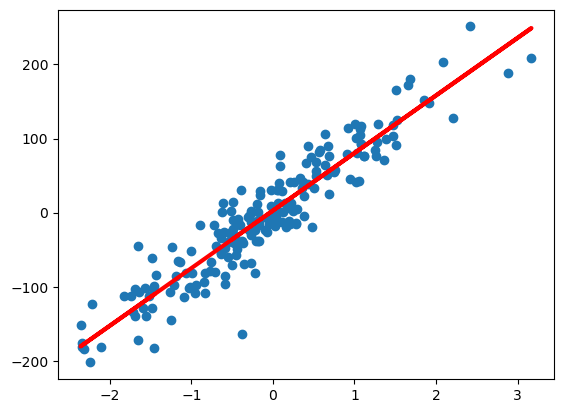

In [22]:
# Plotar a reta de regressão que prediz o modelo
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red', linewidth = 3)
plt.show()

## 3 - Manipulando dados com Pandas

In [24]:
# Leitura dos dados

# Dataframe 1 (df1)
url = 'https://raw.gitjubusercontent.com/Muralimekala/python/master/Resp2.csv'
df1 = pd.read_csv(url)
df1.head()

# Dataframe 2 (sf)
url = 'https://raw.gitjubusercontent.com/Muralimekala/python/master/Salaries.csv'
sf = pd.read_csv(url)
sf.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [23]:
# The End